# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre: Jose Nicolas Rodriguez Montoya

Identificación: 1066865113

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [1]:
# Librerias útiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Ridder** es un algoritmo de búsqueda de raíces que, como la bisección, requiere un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. A diferencia de la bisección, Ridder introduce una corrección exponencial para acelerar la convergencia, logrando **convergencia cuadrática** sin requerir derivadas.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ y un intervalo $[a, b]$ tal que:

   - $f(a) \cdot f(b) < 0$ (la función tiene signos opuestos en los extremos del intervalo).
   - La función debe ser continua en $[a, b]$.

2. **Calcular el punto medio**:

   $$
   m = \frac{a + b}{2}
   $$

3. **Calcular la corrección exponencial**:

   - Evaluar $f(a)$, $f(b)$ y $f(m)$.
   - Calcular:

     $$
     s = \sqrt{f(m)^2 - f(a) f(b)}
     $$

   - Si $s = 0$, detener: la raíz no puede estimarse en esta iteración.

   - Calcular el nuevo candidato a raíz:

     $$
     x = m + \frac{(m - a) f(m)}{s} \cdot \text{sign}(f(a) - f(b))
     $$

4. **Evaluar $f(x)$** y actualizar el intervalo:

   - Si $f(m) \cdot f(x) < 0$, entonces la nueva raíz está entre $m$ y $x$.
   - Si $f(a) \cdot f(x) < 0$, entonces actualizar $b = x$, luego $f(b) = f(x)$.
   - Si $f(b) \cdot f(x) < 0$, entonces actualizar $a = x$, luego $f(a) = f(x)$.
   - En cada paso mantener la condición $f(a) \cdot f(b) < 0$.

5. **Criterio de parada**:

   - Repetir los pasos anteriores hasta que se alcance la tolerancia deseada:

     $$
     |f(x)| < \varepsilon \quad \text{o} \quad |b - a| < \delta
     $$

   donde $\varepsilon$ y $\delta$ son tolerancias establecidas por el usuario.

---

* Defina una función llamada `Ridder` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame con los datos de $x$ y $f(x)$, y encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Ridder encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -20, 20)

# Grafico semilog

plt.semilogy(N, tol)

```

In [89]:
# Aquí va su código
M = lambda a, b: (a + b)/2 #funcion auxiliar para el punto medio
s = lambda f, ms, a_s, b_s : np.sqrt((f(ms)**2)-(f(a_s)*f(b_s)))

def Ridder (f, a, b, tol=1e-8, maxiter=1000):
  '''
  Toma una funcion y dos puntos que tengan signos opuestos de la funcion y retorna su raiz

  parametros:
  f = la funcion
  a = primer valor
  b = segund valor
  tol = epsilon que usaremos
  maxiter = rango maximo de iteraciones

  '''

  for i in range(maxiter):

    m = M(a, b)
    if f(a)*f(b)>0:
      raise ValueError('f(a) y f(b) deben tener signos diferentes')

    if s(f, m, a, b) <= tol:
      raise ValueError('no es posible continuar con la iteracion')
    else:
      x = m +(((m - a)*f(m))/(s(f, m,a, b)))*(np.sign(f(a)-f(b)))

      if abs(f(x))< tol:
        print(f'{x} es una raiz')
        return x, i

      elif f(m)*f(x) < 0:
        a = m
        b = x

      elif f(a)*f(x) < 0:
        b = x
        n +=1
      elif f(b)*f(x) < 0:
        a=x
        n+=1
  print('maximo de iteraciones alcanzando')










      thetas  f(thetas)
43  0.682265   0.093881
44  0.698132   0.067913
45  0.713998   0.041751
46  0.729865   0.015399
47  0.745732  -0.011140
48  0.761598  -0.037864
49  0.777465  -0.064771
50  0.793331  -0.091857
0.7390851332162256 es una raiz
0.7390851332162256 es una raiz
 tenemos una raiz en x0.7390851332162256 y tomo 3 iteracioness
0.7390851332162256 es una raiz
1.467936883159382e-12


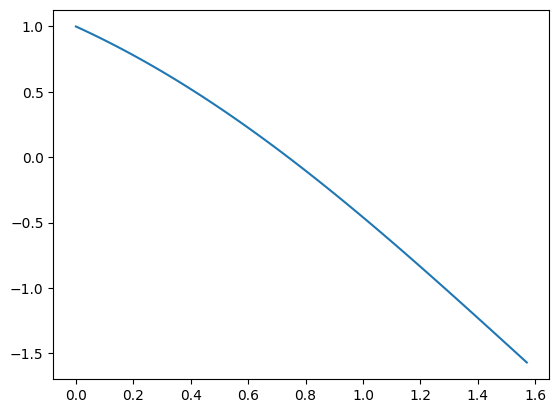

In [92]:
f = lambda x: np.cos(x)-x
x = np. radians(np.linspace(0, 90, 100))

plt.plot(x, f(x))

d = {'thetas': x, 'f(thetas)': f(x)}

table = pd.DataFrame(d)
table

print(table[(table['f(thetas)']<0.1) & (table['f(thetas)']>- (0.1))])

print (f' tenemos una raiz en x{Ridder(f, 0, 1)[0]} y tomo {Ridder(f, 0, 1)[1]} iteracioness')

#diferencia
print(abs(bisect(f, 0, 1)-Ridder(f, 0, 1)[0]))





#2

**(60 puntos)** En óptica, cuando un rayo de luz atraviesa la interfaz entre dos medios con diferentes índices de refracción, su dirección cambia según la ley de Snell. Para el caso de un prisma triangular, cuando un rayo emerge después de dos refracciones, el ángulo de desviación total $\delta$ está dado por:

$$\delta(\theta_i) = \theta_i + \arcsin\left(n\sin\left(A - \arcsin\left(\frac{\sin\theta_i}{n}\right)\right)\right) - A$$

donde $\theta_i$ es el ángulo de incidencia, $n$ es el índice de refracción del prisma y $A$ es el ángulo del prisma.

La derivada de esta función con respecto al ángulo de incidencia $\theta_i$ es:

$$\frac{d\delta}{d\theta_i} = 1 - \frac{\cos\theta_i \cdot \cos(A-\theta_r)}{\cos\theta_r \cdot \sqrt{1-n^2\sin^2(A-\theta_r)}}$$

donde $\theta_r = \arcsin\left(\frac{\sin\theta_i}{n}\right)$ es el ángulo de refracción en la primera interfaz.

Considere un prisma de vidrio crown con $n = 1.52$ y $A = 60°$.

### Parte A:
* Escriba una función explicita y documentada para $\frac{d\delta}{d\theta_i}$

* Realice un gráfico para $\frac{d\delta}{d\theta_i}$ y encuentre el ángulo de incidencia $\theta_i$ que produce el ángulo de desviación mínimo para $\theta_i \in [30°, 80°]$.

* Use el método de Newton-Raphson (sin derivada) y el método de la secante para hallar el ángulo de desviación mínimo.


### Parte B:
* Determine el ángulo crítico $\theta_c$ para el cual el rayo comienza a experimentar reflexión interna total en la segunda interfaz del prisma. Esta condición ocurre cuando:

$$\sin(A - \theta_r) = \frac{1}{n}$$

* Resuelva numéricamente la ecuación anterior para encontrar el ángulo de incidencia $\theta_i$ correspondiente a este ángulo crítico, utilizando el método de la bisección.





angulo minimo hayado con el metodo de newton 49.46419788868343
angulo encontrado con el metodo de la secante 49.46419788868343


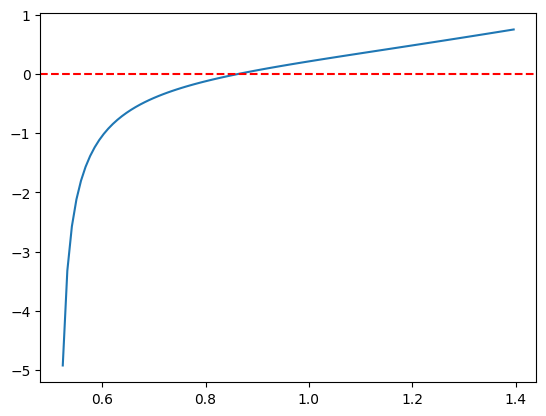

In [48]:
# Aquí va su código
n = 1.52
A = np.radians(60)  # damos los parametros de la funcion en el caso particular.

#Creamos un espacio con los valores de theta que queremos que tome y los pasamos a radianes

thetas = np.radians(np.linspace(30, 80, 100))

delta = lambda t : t + np.asin(n*np.sin(A - np.asin(np.sen(t/n)))) - A  #escribimos la funcion $delta$


#Para delta prime es necesario calcular un theta_r que consideraremos como otra funcion auxiliar

t_r = lambda t: np.asin(np.sin(t)/n)


delta_prime = lambda t: 1 - ((np.cos(t) * np.cos(A - t_r(t)))/(np.cos(t_r(t)) * np.sqrt(1 - (n**2)*(np.sin(A - t_r(t)))**2)))

plt.plot(thetas, delta_prime(thetas))
plt.axhline(y = 0, color= 'red', linestyle = '--')


# como nos estan pidiend un maximo y un minimo debemos hallar las raices de esta funcion derivada

#Metodo de newton.
angulo = np.rad2deg(newton(delta_prime, 0.7))
print(f'angulo minimo hayado con el metodo de newton {angulo}')

#Metodo de la secante
angulosec = np.rad2deg(newton(delta_prime,x0 = 0.7, x1=1.2))
print(f'angulo encontrado con el metodo de la secante {angulosec}')






El angulo critico de esta funcion hallado con el metodo de biseccion es 0.5136536662190336


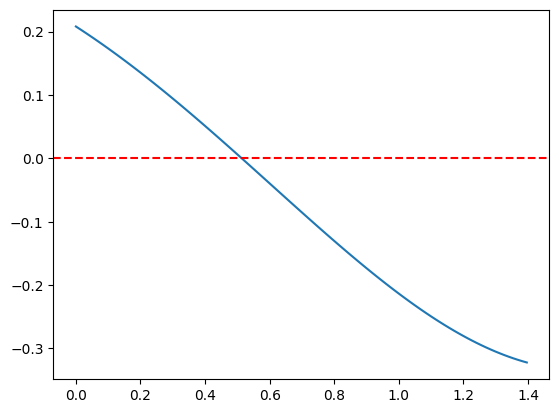

In [47]:
# Parte B
thetas_crit = np.radians(np.linspace(0 , 80, 100))
Theta_crit = lambda t: np.sin(A - t_r(t)) - 1/n #definimos la funcion de esta segunda funcion

plt.plot(thetas_crit, Theta_crit(thetas_crit))
plt.axhline(0, color= 'red', linestyle = '--')

print(f'El angulo critico de esta funcion hallado con el metodo de biseccion es {bisect(Theta_crit, 0.2, 1)}')